**Data Source:** [Zimnat Insurance Recommendation Challenge on Zindi](https://zindi.africa/competitions/zimnat-insurance-recommendation-challenge/data)

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("bright")

from tqdm import tqdm, trange
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("data/Train.csv", parse_dates=['join_date']); display(train.head())
test = pd.read_csv("data/Test.csv", parse_dates=['join_date']); display(test.head())
sample = pd.read_csv("data/SampleSubmission.csv"); display(sample.head())

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,2019-01-02,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,2019-01-06,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,2013-01-06,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,2019-01-08,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,2019-01-08,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,F86J5PC,2018-01-12,M,M,1984,94KC,DZRV,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,H6141K3,2019-01-10,M,M,1996,1X1H,J9SY,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,RBAYUXZ,2020-01-01,F,W,1968,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,KCBILBQ,2019-01-02,M,M,1989,94KC,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,LSEC1ZJ,2020-01-02,F,M,1982,UAOD,0KID,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


,ID X PCODE,Label
0,F86J5PC X P5DA,0
1,F86J5PC X RIBP,0
2,F86J5PC X 8NN1,0
3,F86J5PC X 7POT,0
4,F86J5PC X 66FJ,0


In [3]:
# variable descriptions
with open("data/VariableDefinitions.txt", 'r') as f:
    for l in f.readlines():
        print(l)

ID - unique user id

join_date - date the joined zimnat

sex - sex of the client

marital_status - married status of the client

birth_year - year client was born in

branch_code - branch where client signed up

occupation_code - a code that describes what the client does 

occupation_category_code - the category the clients job falls under

P5DA - product code

RIBP - product code

8NN1 - product code

7POT - product code

66FJ - product code

GYSR - product code

SOP4 - product code

RVSZ - product code

PYUQ - product code

LJR9 - product code

N2MW - product code

AHXO - product code

BSTQ - product code

FM3X - product code

K6QO - product code

QBOL - product code

JWFN - product code

JZ9D - product code

J9JW - product code

GHYX - product code

ECY3 - product code



In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        29132 non-null  object        
 1   join_date                 29130 non-null  datetime64[ns]
 2   sex                       29132 non-null  object        
 3   marital_status            29132 non-null  object        
 4   birth_year                29132 non-null  int64         
 5   branch_code               29132 non-null  object        
 6   occupation_code           29132 non-null  object        
 7   occupation_category_code  29132 non-null  object        
 8   P5DA                      29132 non-null  int64         
 9   RIBP                      29132 non-null  int64         
 10  8NN1                      29132 non-null  int64         
 11  7POT                      29132 non-null  int64         
 12  66FJ              

In [5]:
train.isnull().sum()

ID                          0
join_date                   2
sex                         0
marital_status              0
birth_year                  0
branch_code                 0
occupation_code             0
occupation_category_code    0
P5DA                        0
RIBP                        0
8NN1                        0
7POT                        0
66FJ                        0
GYSR                        0
SOP4                        0
RVSZ                        0
PYUQ                        0
LJR9                        0
N2MW                        0
AHXO                        0
BSTQ                        0
FM3X                        0
K6QO                        0
QBOL                        0
JWFN                        0
JZ9D                        0
J9JW                        0
GHYX                        0
ECY3                        0
dtype: int64

In [6]:
test.isnull().sum()

ID                          0
join_date                   1
sex                         0
marital_status              0
birth_year                  0
branch_code                 0
occupation_code             0
occupation_category_code    0
P5DA                        0
RIBP                        0
8NN1                        0
7POT                        0
66FJ                        0
GYSR                        0
SOP4                        0
RVSZ                        0
PYUQ                        0
LJR9                        0
N2MW                        0
AHXO                        0
BSTQ                        0
FM3X                        0
K6QO                        0
QBOL                        0
JWFN                        0
JZ9D                        0
J9JW                        0
GHYX                        0
ECY3                        0
dtype: int64

In [7]:
train[train.join_date.isna()]

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
15964,HJJGYKK,NaT,M,U,1960,748L,0OJM,T4MS,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
21729,QZFEQGO,NaT,M,M,1974,O67J,5JRZ,L44T,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1


In [8]:
# Fill missing dates with mean join date
train.fillna(train.join_date.mean().date(), inplace=True)
test.fillna(test.join_date.mean().date(), inplace=True)

In [9]:
# Check for duplicates
train[train.duplicated()]

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3


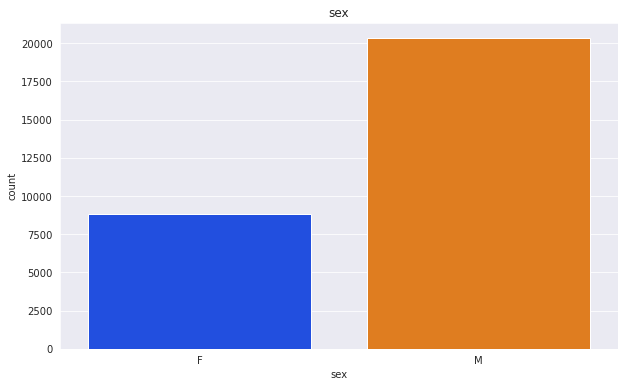

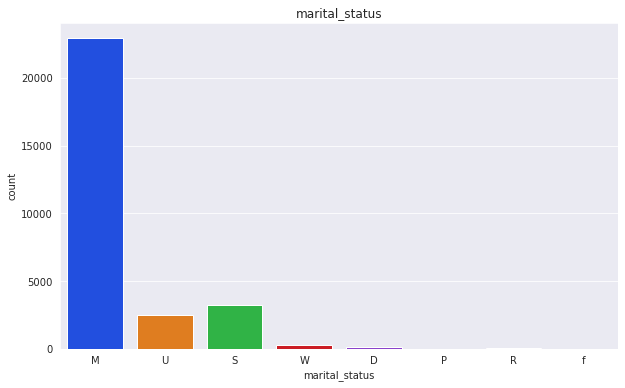

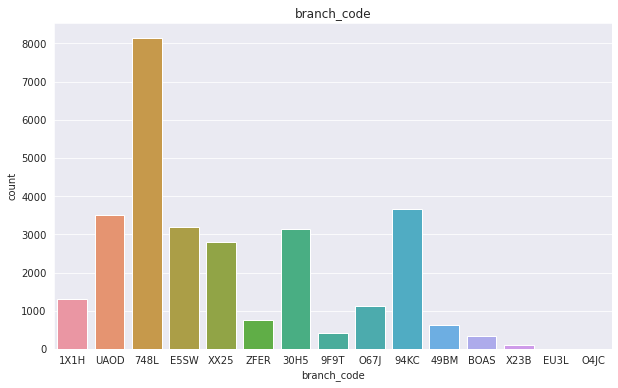

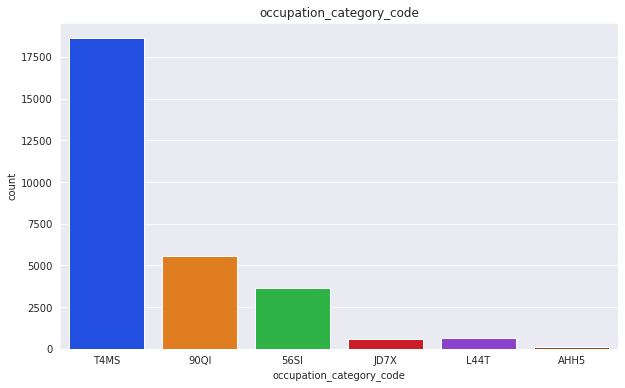

In [12]:
# Plots of how values are distributed across categorical columns
for col in train.columns:
    if (train[col].dtype == 'O') & (train[col].nunique() < 20):
        plt.figure(figsize=(10,6))
        sns.countplot(x=train[col])
        plt.title(f"{col}")

In [17]:
# Earliest and latest join dates
print(f"Earliest join date: {train.join_date.min().date()}\nLatest join date: {train.join_date.max().date()}")

Earliest join date: 2010-01-05
Latest join date: 2020-01-08


Seems that the data spans a period of 10years.

<AxesSubplot:xlabel='join_date', ylabel='count'>

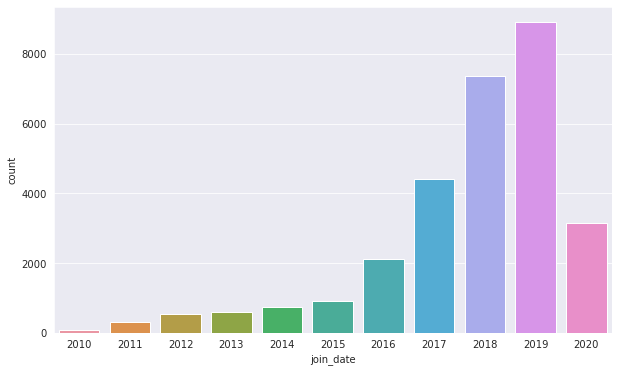

In [25]:
# Occurrences of each year
year_col = pd.to_datetime(train.join_date).dt.year
plt.figure(figsize=(10,6))
sns.countplot(x=year_col)

<AxesSubplot:xlabel='join_date', ylabel='count'>

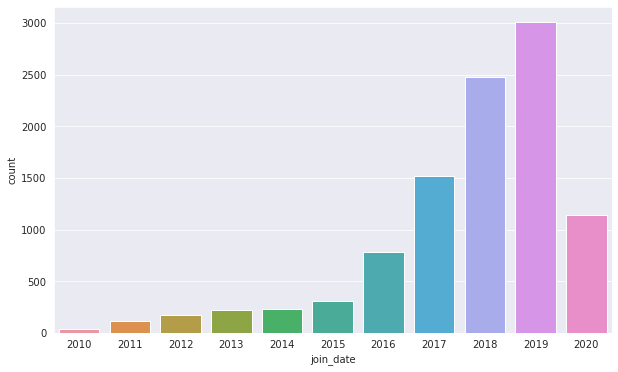

In [26]:
# For test data
year_col = pd.to_datetime(test.join_date).dt.year
plt.figure(figsize=(10,6))
sns.countplot(x=year_col)

Same distribution in test.

Text(0.5, 1.0, 'Test')

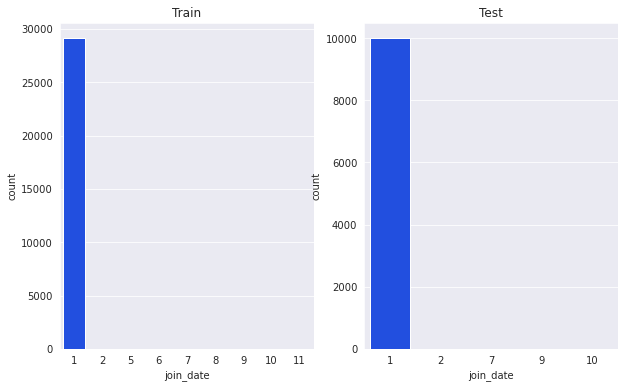

In [27]:
# Occurrences by month
month_col_train = pd.to_datetime(train.join_date).dt.month
month_col_test = pd.to_datetime(test.join_date).dt.month

fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.countplot(x=month_col_train, ax=ax[0])
ax[0].set_title("Train")
sns.countplot(x=month_col_test, ax=ax[1])
ax[1].set_title("Test")

In [28]:
month_col_train.value_counts()

1     29120
8         3
9         2
6         2
11        1
10        1
7         1
5         1
2         1
Name: join_date, dtype: int64

In [29]:
month_col_test.value_counts()

1     9996
7        1
10       1
2        1
9        1
Name: join_date, dtype: int64

**The data spans majorly only the month of January.**

Text(0.5, 1.0, 'Test')

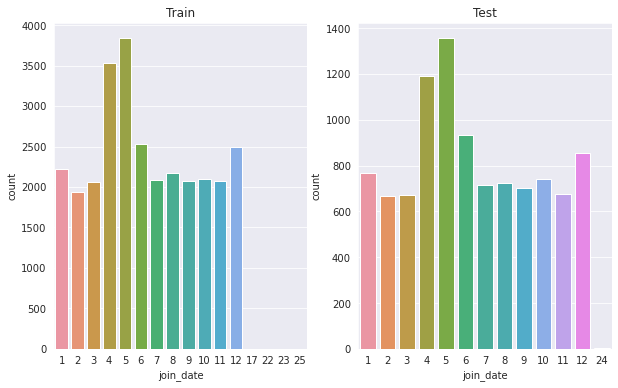

In [31]:
# How about the days?
day_col_train = pd.to_datetime(train.join_date).dt.day
day_col_test = pd.to_datetime(test.join_date).dt.day

fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.countplot(x=day_col_train, ax=ax[0])
ax[0].set_title("Train")
sns.countplot(x=day_col_test, ax=ax[1])
ax[1].set_title("Test")

The data spans only the first 12 days of January.  

-

Given the above observations, it is right to assume that data points which do not fall in these time frames are outliers.  
First we do feature engineering and then drop these particular data points.(after introducing columns that make it easy to do so - year, month, day). We'll then drop the month column since it covers only January - a single unique value in the whole column has no input to model effectiveness.

In [39]:
# Studying marital_status column
train.marital_status.value_counts()

M    22913
S     3267
U     2474
W      301
D      135
R       34
P        7
f        1
Name: marital_status, dtype: int64

In [40]:
# Replace 'f' with 'F' to match the one statistic available in test data
train.marital_status.replace('f', 'F', inplace=True)

<AxesSubplot:xlabel='birth_year', ylabel='Density'>

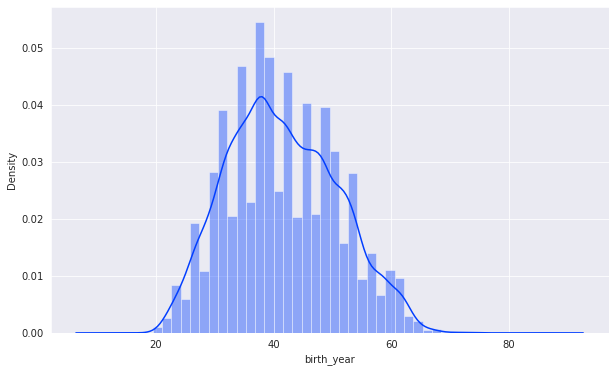

In [117]:
# Distribution of clients' ages
ages = 2021 - train.birth_year

plt.figure(figsize=(10,6))
sns.distplot(ages, kde=True)

In [42]:
# Oldest and youngest client
train.birth_year.min(), train.birth_year.max()

(1932, 2011)

In [79]:
np.round((pd.to_datetime(pd.Timestamp.now().date()) - pd.to_datetime(train.birth_year)).apply(lambda x: int(str(x).split(' days')[0]))/364).astype(int)

0        51
1        51
2        51
3        51
4        51
         ..
29127    51
29128    51
29129    51
29130    51
29131    51
Name: birth_year, Length: 29132, dtype: int64

In [121]:
# Feature engineering function
from sklearn.preprocessing import LabelEncoder

def feat_eng(df):
    # date features
    df['join_year'] = pd.to_datetime(df.join_date).dt.year
    df['join_month'] = pd.to_datetime(df.join_date).dt.month
    df['join_day'] = pd.to_datetime(df.join_date).dt.day
    df['join_weekday'] = pd.Series(pd.to_datetime(df.join_date).dt.weekday).apply(lambda x: 1 if x<5 else 0) # if weekday or weekeend
    df['days_todate'] = pd.to_datetime(pd.Timestamp.now().date()) - pd.to_datetime(df.join_date)
    df.days_todate = df.days_todate.apply(lambda x: int(str(x).split(' days')[0])) # remove string 'days'
    df['years_todate'] = df.days_todate.apply(lambda x: int(np.round(x/364, decimals=0)))
    df['birth_tojoin'] = df.join_year - df.birth_year # number of years from birth to becoming a client
    df['age'] = 2021 - df.birth_year
    
    # label encode categorical columns
    le = LabelEncoder()
    
    df['sex_le'] = le.fit_transform(df.sex)
    df['marital_le'] = le.fit_transform(df.marital_status)
    df['birth_le'] = le.fit_transform(df.birth_year)
    df['branch_cle'] = le.fit_transform(df.branch_code)
    df['occupation_cle'] = le.fit_transform(df.occupation_code)
    df['occupation_ccle'] = le.fit_transform(df.occupation_category_code)
    
    # combination features
    df['sex_marital'] = df.sex + '_' + df.marital_status
    df['sex_branch'] = df.sex + '_' + df.branch_code
    df['sex_occupation'] = df.sex + '_' + df.occupation_code
    df['sex_occupation_category'] = df.sex + '_' + df.occupation_category_code
    
    # label encode combination features
    df['sex_marital_le'] = le.fit_transform(df.sex_marital) 
    df['sex_branch_le'] = le.fit_transform(df.sex_branch)
    df['sex_occupation_le'] = le.fit_transform(df.sex_occupation)
    df['sex_occupation_category_le'] = le.fit_transform(df.sex_occupation_category)
    
    # more features may be designed by converting some columns eg. age to categories eg. 10-20, 20-30 etc
    

In [122]:
# Join train and test, apply function then separate
train['separator'] = 'train'; test['separator'] = 'test'
data = pd.concat([train, test])
feat_eng(data)

train = data[data.separator == 'train']; train.drop('separator', axis=1, inplace=True)
test = data[data.separator == 'test']; test.drop('separator', axis=1, inplace=True)

display(train.head())
display(test.head())

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,join_year,join_day,join_weekday,days_todate,years_todate,birth_tojoin,age,sex_le,marital_le,birth_le,branch_cle,occupation_cle,occupation_ccle,sex_marital,sex_branch,sex_occupation,sex_occupation_category,sex_marital_le,sex_branch_le,sex_occupation_le,sex_occupation_category_le,join_month
0,4WKQSBB,2019-01-02 00:00:00,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2019,2,1,842,2,32,34,0,2,45,0,19,5,F_M,F_1X1H,F_2A7I,F_T4MS,1,0,13,5,1
1,CP5S02H,2019-01-06 00:00:00,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2019,6,0,838,2,38,40,0,2,39,11,19,5,F_M,F_UAOD,F_2A7I,F_T4MS,1,11,13,5,1
2,2YKDILJ,2013-01-06 00:00:00,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2013,6,0,3029,8,22,30,1,6,49,3,185,1,M_U,M_748L,M_QZYX,M_90QI,13,18,342,7,1
3,2S9E81J,2019-01-08 00:00:00,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2019,8,1,836,2,29,31,1,2,48,0,82,0,M_M,M_1X1H,M_BP09,M_56SI,9,15,243,6,1
4,BHDYVFT,2019-01-08 00:00:00,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2019,8,1,836,2,29,31,1,2,48,3,157,5,M_M,M_748L,M_NO3L,M_T4MS,9,18,314,11,1


,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,join_year,join_day,join_weekday,days_todate,years_todate,birth_tojoin,age,sex_le,marital_le,birth_le,branch_cle,occupation_cle,occupation_ccle,sex_marital,sex_branch,sex_occupation,sex_occupation_category,sex_marital_le,sex_branch_le,sex_occupation_le,sex_occupation_category_le,join_month
0,F86J5PC,2018-01-12 00:00:00,M,M,1984,94KC,DZRV,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,12,1,1197,3,34,37,1,2,42,4,96,1,M_M,M_94KC,M_DZRV,M_90QI,9,19,257,7,1
1,H6141K3,2019-01-10 00:00:00,M,M,1996,1X1H,J9SY,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2019,10,1,834,2,23,25,1,2,54,0,128,1,M_M,M_1X1H,M_J9SY,M_90QI,9,15,287,7,1
2,RBAYUXZ,2020-01-01 00:00:00,F,W,1968,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2020,1,1,478,1,52,53,0,7,26,11,19,5,F_W,F_UAOD,F_2A7I,F_T4MS,6,11,13,5,1
3,KCBILBQ,2019-01-02 00:00:00,M,M,1989,94KC,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,2,1,842,2,30,32,1,2,47,4,19,5,M_M,M_94KC,M_2A7I,M_T4MS,9,19,183,11,1
4,LSEC1ZJ,2020-01-02 00:00:00,F,M,1982,UAOD,0KID,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2020,2,1,477,1,38,39,0,2,40,11,3,5,F_M,F_UAOD,F_0KID,F_T4MS,1,11,2,5,1


### **Removing the outliers**
And dropping the month column

In [123]:
train = train[train.join_month == 1]
train = train[train.join_day < 13]

train.drop('join_month', axis=1, inplace=True); test.drop('join_month', axis=1, inplace=True)

In [124]:
# Feature columns (for modeling)
feat_cols = ['birth_year', 'join_year', 'join_day', 'join_weekday', 'days_todate',
       'years_todate', 'birth_tojoin', 'age', 'sex_le', 'marital_le',
       'birth_le', 'branch_cle', 'occupation_cle', 'occupation_ccle',
       'sex_marital_le', 'sex_branch_le', 'sex_occupation_le',
       'sex_occupation_category_le']
             
train[feat_cols]

,birth_year,join_year,join_day,join_weekday,days_todate,years_todate,birth_tojoin,age,sex_le,marital_le,birth_le,branch_cle,occupation_cle,occupation_ccle,sex_marital_le,sex_branch_le,sex_occupation_le,sex_occupation_category_le
0,1987,2019,2,1,842,2,32,34,0,2,45,0,19,5,1,0,13,5
1,1981,2019,6,0,838,2,38,40,0,2,39,11,19,5,1,11,13,5
2,1991,2013,6,0,3029,8,22,30,1,6,49,3,185,1,13,18,342,7
3,1990,2019,8,1,836,2,29,31,1,2,48,0,82,0,9,15,243,6
4,1990,2019,8,1,836,2,29,31,1,2,48,3,157,5,9,18,314,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29127,1974,2019,9,1,835,2,45,47,0,2,32,3,19,5,1,3,13,5
29128,1987,2018,11,1,1198,3,31,34,1,2,45,13,179,1,9,28,336,7
29129,1985,2019,2,1,842,2,34,36,1,2,43,6,46,5,9,21,209,11
29130,1989,2019,7,1,837,2,30,32,1,2,47,11,19,5,9,26,183,11
